In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

In [2]:
# approximate time step for end of 2nd rupture
C_r2 = 11500

# Figure for difference in strain of the center

In [31]:
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vD2_strainCenter.pkl', 'rb')
strainCenter_D  = pickle.load(f)
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vHM2_strainCenter.pkl', 'rb')
strainCenter_HM = pickle.load(f)

In [32]:
strainCenter_D[:,0:C_r2].shape

(51, 11500)

Text(0.5, 0, 'Time Step')

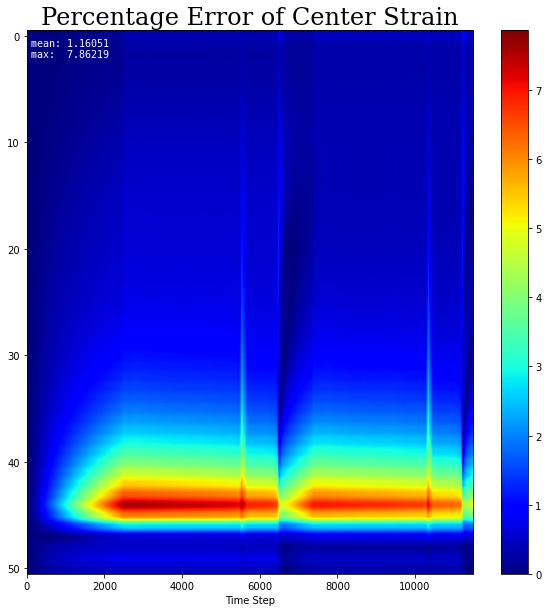

In [33]:
diff = abs(strainCenter_D[:,0:C_r2] - strainCenter_HM[:,0:C_r2]) / strainCenter_D[:,0:C_r2] *100

plt.figure(figsize=(10,10))

plt.imshow(diff, aspect='auto', cmap='jet')

# prettify
plt.colorbar()

plt.title('Percentage Error of Center Strain Rate', fontfamily='serif', fontsize=24)
plt.text(s='mean: %.5f' %diff.mean(), x=100, y=1, fontfamily='monospace', c='w')
plt.text(s='max:  %.5f'%diff.max(), x=100, y=2, fontfamily='monospace', c='w')

plt.xlabel('Time Step')

# Figure for cumulative slip of fault after 2 ruptures

In [59]:
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vD2_V.pkl', 'rb')
slipD = pickle.load(f)
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vHM2_V.pkl', 'rb')
slipHM = pickle.load(f)

Text(0.5, 1.0, 'Percent Slip Difference')

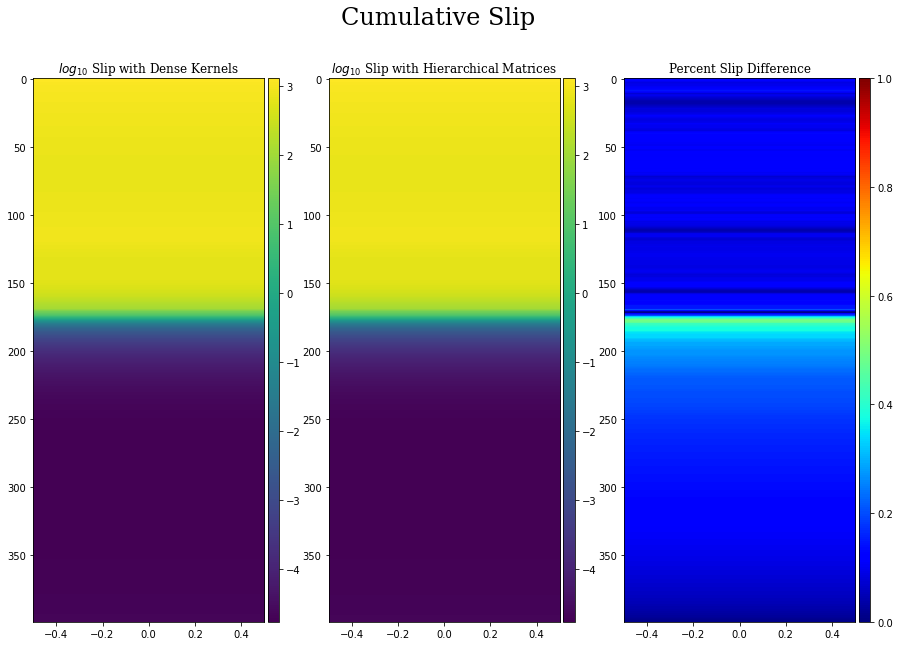

In [63]:
slipDsum = np.sum(slipD, axis=1)
slipHMsum= np.sum(slipHM, axis=1)
diff = abs(slipDsum - slipHMsum) / slipDsum * 100

fig, axs = plt.subplots(1,3, figsize=(15,10))

im0 = axs[0].imshow( np.log10( np.expand_dims(slipDsum, axis=1) ), aspect='auto')
im1 = axs[1].imshow( np.log10( np.expand_dims(slipHMsum,axis=1) ), aspect='auto')

im2 = axs[2].imshow( np.expand_dims(diff, axis=1) , aspect='auto', cmap='jet', vmax=1, vmin=0)

# colorbars
div = make_axes_locatable(axs[0])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

div = make_axes_locatable(axs[1])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

div = make_axes_locatable(axs[2])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

# titles and such
fig.suptitle('Cumulative Slip', fontfamily='serif', fontsize=24)
axs[0].set_title(r'$log_{10}$ Slip with Dense Kernels', fontfamily='serif')
axs[1].set_title(r'$log_{10}$ Slip with Hierarchical Matrices', fontfamily='serif')
axs[2].set_title(r'Percent Slip Difference', fontfamily='serif')

# Movie for instantaneous error in shear zone

In [14]:
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vD2_strainAll.pkl', 'rb')
sAllD = pickle.load(f)
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vHM2_strainAll.pkl', 'rb')
sAllHM = pickle.load(f)

In [15]:
m = 10000
sAllD = sAllD[:,0:m]
sAllHM = sAllHM[:,0:m]

In [16]:
diff = np.log10( abs(sAllD - sAllHM))

In [17]:
diff = np.nan_to_num(diff)

In [18]:
diff[diff > -50].min()

-29.801969570734137

In [19]:
diff[diff < -50] = -50

In [20]:
diff.shape

(2601, 10000)

In [21]:
diff[:,0].shape 

(2601,)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


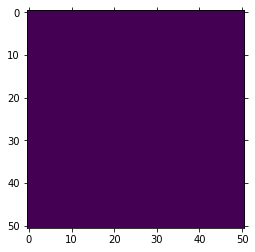

In [22]:
fig, ax = plt.subplots()
def makeFrame(n):
    ax.clear()
    frame = diff[:,0].reshape(51,51)
    ax.imshow(frame)
    return frame

animation = VideoClip(makeFrame, duration=10)
animation.ipython_display(fps=20, loop=True, autoplay=True)

# Figure for Cumulative Strain

In [65]:
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vD2_strainAll.pkl', 'rb')
sAllD = pickle.load(f)
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vHM2_strainAll.pkl', 'rb')
sAllHM = pickle.load(f)

sAllD = sAllD
sAllHM = sAllHM

print(sAllD.max())
print(sAllHM.max())
print(sAllD.min())
print(sAllHM.min())

sAllD = sAllD.sum(axis=1)
sAllHM = sAllHM.sum(axis=1)

sAllD = sAllD.reshape(51,51)
sAllHM = sAllHM.reshape(51,51)

diff = ( abs( sAllD - sAllHM ) ) / sAllD * 100

sAllD = np.log10(sAllD)
sAllHM = np.log10(sAllHM)

1.5815000181104778e-14
1.6104409868496938e-14
4.20331651190429e-15
4.226518109458685e-15


Text(0, 0.5, 'Mesh block in $\\hat{z}$')

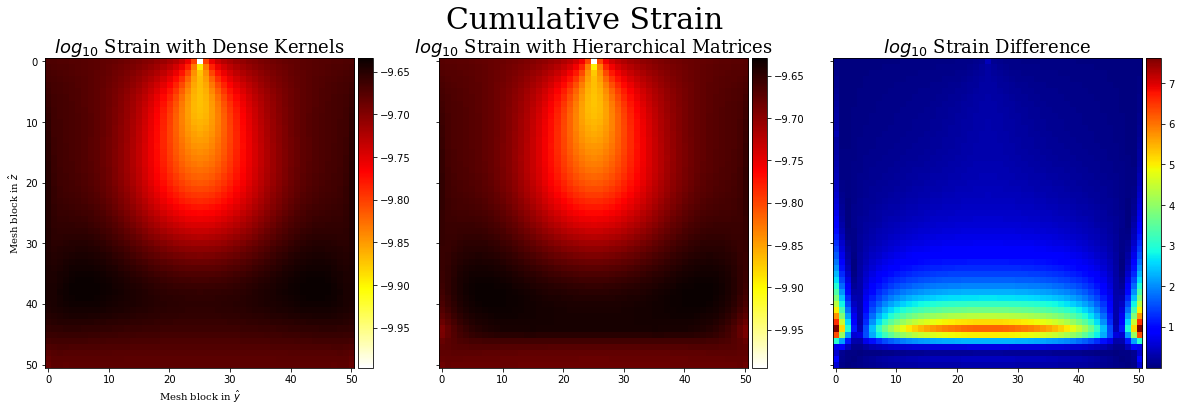

In [55]:
fig, axs = plt.subplots(1,3, figsize=(20,6), sharey=True)

cmin = diff.min()
cmax = sAllD.max()

im0 = axs[0].imshow( sAllD,  cmap='hot_r')
im1 = axs[1].imshow( sAllHM, cmap='hot_r')#, vmin=cmin, vmax=cmax)
im2 = axs[2].imshow( diff,   cmap='jet')#, vmin=cmin, vmax=cmax)

div = make_axes_locatable(axs[0])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

div = make_axes_locatable(axs[1])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

div = make_axes_locatable(axs[2])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

# prettify 
plt.suptitle('Cumulative Strain', fontfamily='serif', fontsize=30)

axs[0].set_title(r'$log_{10}$ Strain with Dense Kernels', fontfamily='serif', fontsize=18)
axs[1].set_title(r'$log_{10}$ Strain with Hierarchical Matrices', fontfamily='serif', fontsize=18)
axs[2].set_title(r'$log_{10}$ Strain Difference', fontfamily='serif', fontsize=18)

#for ax in axs:
#   ax.set_xlabel(r'Mesh block in $\hat{y}$', fontfamily='serif')
#    ax.set_ylabel(r'Mesh block in $\hat{z}$', fontfamily='serif')

axs[0].set_xlabel(r'Mesh block in $\hat{y}$', fontfamily='serif')
axs[0].set_ylabel(r'Mesh block in $\hat{z}$', fontfamily='serif')

# Rupture Slip Figure

1. Define a rupture using slip rate (maybe >1cm/s)
2. Compare HM and D slip during that rupture 

In [95]:
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vD2_Y.pkl', 'rb')
YD = pickle.load(f)
f = open('/Users/josephwick/Documents/College/SCEC/simOutputPickles/BP1vHM2_Y.pkl', 'rb')
YHM= pickle.load(f)

In [76]:
YD.shape

(20916, 12004)

In [432]:
rstart = 19500
rend = -800

In [433]:
slipD = YD[rstart:rend,0:400*4:4]

In [434]:
slipD.shape

(616, 400)

In [435]:
slipD.shape

(616, 400)

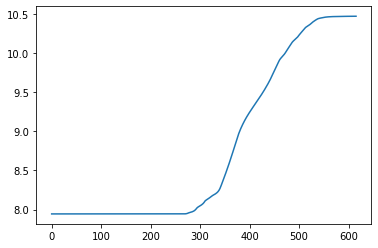

In [436]:
plt.plot(slipD[:,0])

In [437]:
slipHM = YHM[rstart:rend,0:400*4:4]

In [438]:
# get slip from the rupture
slipDr = abs(slipD[0] - slipD[-1])
slipHMr = abs(slipHM[0] - slipHM[-1])

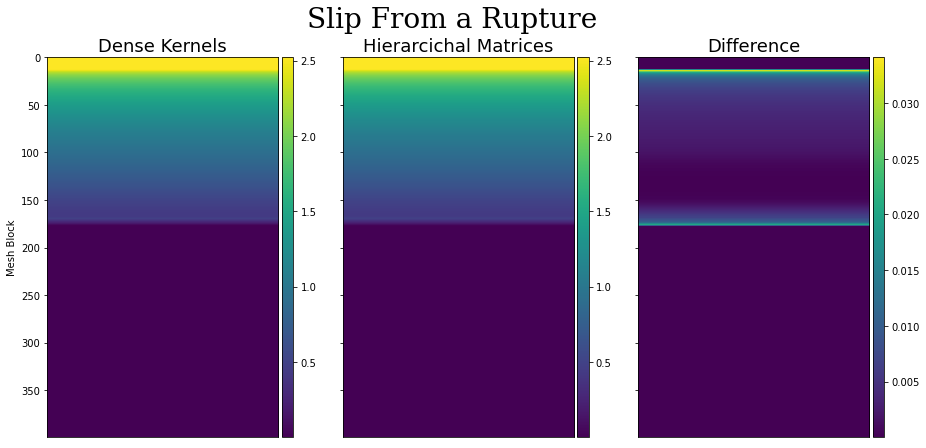

In [510]:
Sdiffl = ( abs(slipDr - slipHMr) )
Sdiffp = abs(slipDr - slipHMr)/slipDr *100

fig, axs = plt.subplots(1,3, figsize=(15,7), sharey=True)

im0=axs[0].imshow( np.expand_dims(slipDr, axis=1), aspect='auto')
im1=axs[1].imshow( np.expand_dims(slipHMr,axis=1), aspect='auto')
im2=axs[2].imshow( np.expand_dims(Sdiffl, axis=1), aspect='auto')

div = make_axes_locatable(axs[0])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

div = make_axes_locatable(axs[1])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

div = make_axes_locatable(axs[2])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

axs[0].axes.get_xaxis().set_visible(False)
axs[1].axes.get_xaxis().set_visible(False)
axs[2].axes.get_xaxis().set_visible(False)

axs[0].set_ylabel('Mesh Block')

plt.suptitle('Slip From a Rupture', fontfamily='serif', fontsize=28)
axs[0].set_title('Dense Kernels', fontsize=18)
axs[1].set_title('Hierarcichal Matrices', fontsize=18)
axs[2].set_title('Difference', fontsize=18)

plt.savefig('SlipFromRupture.pdf')

In [440]:
Sdiffp.max()

267.1269661252097

In [441]:
np.where(Sdiffp == Sdiffp.max())

(array([178]),)

In [442]:
slipDr[178]

0.00017323707028538138

In [443]:
slipHMr[178]

0.0006360000003429178

In [444]:
slipDr[180:-1].mean()

1.1190622185985724e-07

In [445]:
slipHMr[180:-1].mean()

1.4551778373455886e-07

Text(250, 30, '21.1729%')

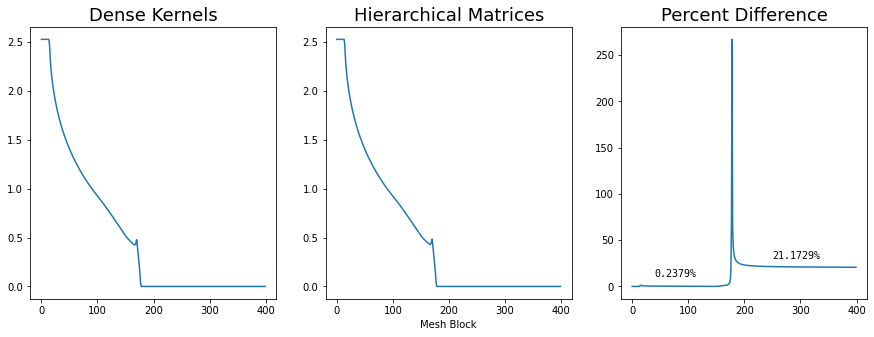

In [446]:
m1 = Sdiffp[0:160].mean()
m2 = Sdiffp[210:-1].mean()

fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].plot(slipDr)
axs[1].plot(slipHMr)
axs[2].plot(Sdiffp)

axs[0].set_title('Dense Kernels', fontsize=18)
axs[1].set_title('Hierarchical Matrices', fontsize=18)
axs[2].set_title('Percent Difference', fontsize=18)

axs[1].set_xlabel('Mesh Block')

axs[2].text(x=40, y=10, s='%.4f'%m1+'%', fontfamily='monospace')
axs[2].text(x=250,y=30, s='%.4f'%m2+'%', fontfamily='monospace')

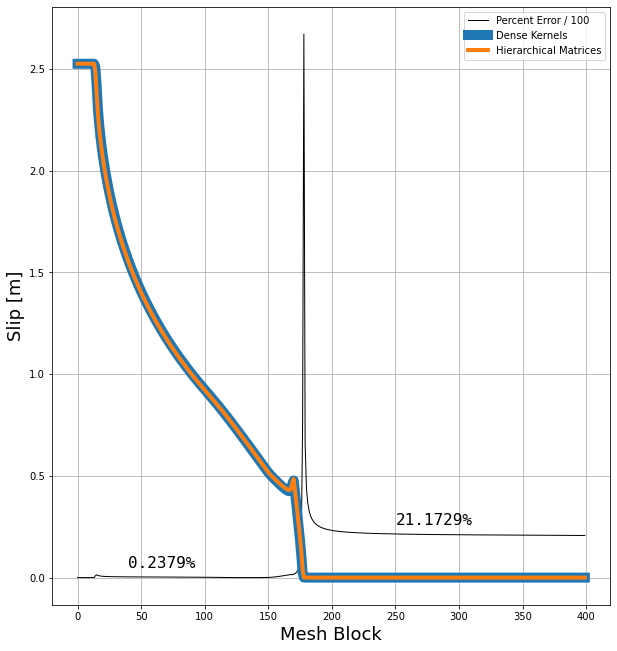

In [542]:
fig, ax = plt.subplots(1,1, figsize=(10,11))
plt.grid()

ax.plot(Sdiffp/100, linewidth=1, c='k')

ax.plot(slipDr, linewidth=10)
ax.plot(slipHMr,linewidth=4)

#plt.title('Fault Error', fontfamily='serif', fontsize=28)

ax.legend(['Percent Error / 100', 'Dense Kernels', 'Hierarchical Matrices'])

ax.text(x=40, y=0.05, s='%.4f'%m1+'%', fontfamily='monospace', fontsize=16)
ax.text(x=250,y=m2/100+0.05, s='%.4f'%m2+'%', fontfamily='monospace', fontsize=16)

ax.set_xlabel('Mesh Block', fontfamily='sans', fontsize=18)
ax.set_ylabel('Slip [m]', fontfamily='sans', fontsize=18)

plt.savefig('faultError.pdf')

Text(0.5, 1.0, '300th Block')

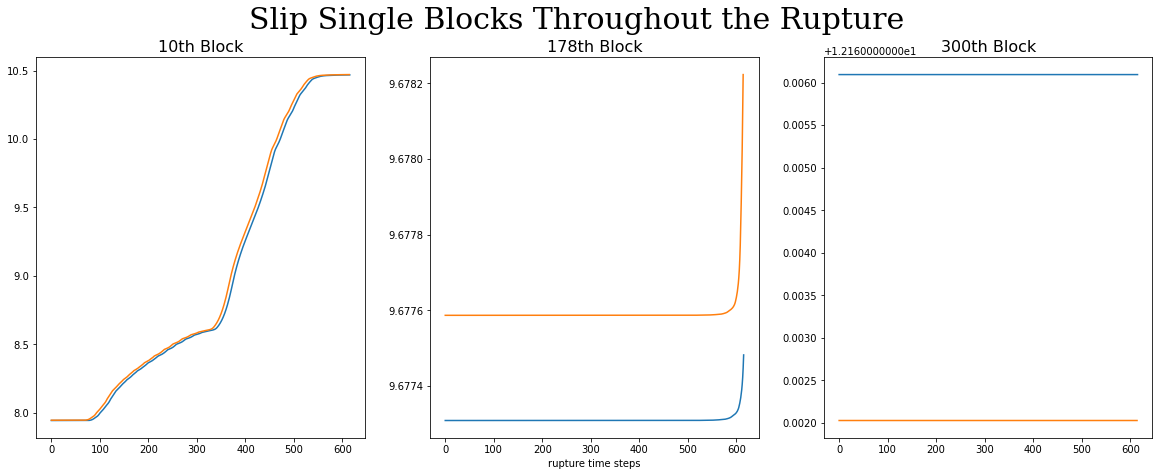

In [455]:
# plotting that spike
fig, axs = plt.subplots(1,3, figsize=(20,7))

axs[0].plot(slipD[:,10])
axs[0].plot(slipHM[:,10], c='tab:orange')

axs[1].plot(slipD[:,178])
axs[1].plot(slipHM[:,178], c='tab:orange')

axs[2].plot(slipD[:,300])
axs[2].plot(slipHM[:,300], c='tab:orange')

axs[1].set_xlabel('rupture time steps')

plt.suptitle('Slip Single Blocks Throughout the Rupture', fontfamily='Serif', fontsize=30)
axs[0].set_title('10th Block', fontsize=16)
axs[1].set_title('178th Block', fontsize=16)
axs[2].set_title('300th Block', fontsize=16)

#plt.xlim(0,200)
#plt.ylim(8,12)

# Rupture Strain Figure

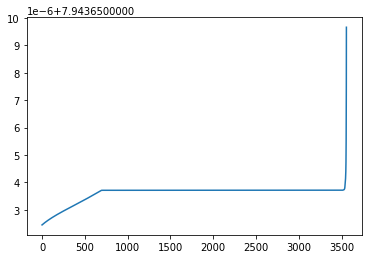

In [498]:
a = 16200
b = -1160
slipD2 = YD[a:b,0:400*4:4]
plt.plot(slipD2[:,0])

In [528]:
e120D = YD[a:b,400*4+2:-1:4]
e120HM = YHM[a:b,400*4+2:-1:4]

In [529]:
e120HM.shape

(3555, 2601)

In [530]:
e120D[0].shape

(2601,)

In [531]:
e120Dr = abs(e120D[0] - e120D[-1])
e120HMr = abs(e120HM[0] - e120HM[-1])

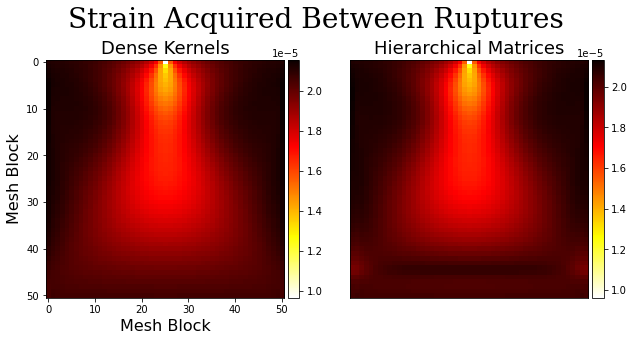

In [538]:
Ediffp = abs(e120Dr - e120HMr) / e120Dr *100
Ediffl = abs(e120Dr - e120HMr)

fig, axs = plt.subplots(1,2, figsize=(10,5))
mn = 1.5e-13
mx = 7e-13

im0 = axs[0].imshow(e120Dr.reshape(51,51), cmap='hot_r')#, vmin=mn, vmax=mx)
im1 = axs[1].imshow(e120HMr.reshape(51,51), cmap='hot_r')#, vmin=mn, vmax=mx)
#im2 = axs[2].imshow(Ediffp.reshape(51,51), cmap='jet')#, vmin=0, vmax=10)

div = make_axes_locatable(axs[0])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

div = make_axes_locatable(axs[1])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

#div = make_axes_locatable(axs[2])
#cax = div.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(im2, cax=cax, orientation='vertical')

plt.suptitle('Strain Acquired Between Ruptures', fontfamily='serif', fontsize=28)
axs[0].set_title('Dense Kernels', fontsize=18)
axs[1].set_title('Hierarchical Matrices', fontsize=18)
#axs[2].set_title('Percentage Error', fontsize=18)

axs[0].set_xlabel('Mesh Block', fontsize=16)
axs[0].set_ylabel('Mesh Block', fontsize=16)

axs[1].axes.get_xaxis().set_visible(False)
axs[1].axes.get_yaxis().set_visible(False)
#axs[2].axes.get_xaxis().set_visible(False)
#axs[2].axes.get_xaxis().set_visible(False)

plt.savefig('straimBtwnRuptures.pdf')

In [521]:
Ediffp.mean()

1.0459995305993066

In [277]:
# can we look at time evolution of center column

In [279]:
e120D[0].shape

(2601,)

In [285]:
cols = []
for frame in e120D:
    f = frame.reshape(51,51)[:,26]
    cols.append(f)
cols = np.array(cols)

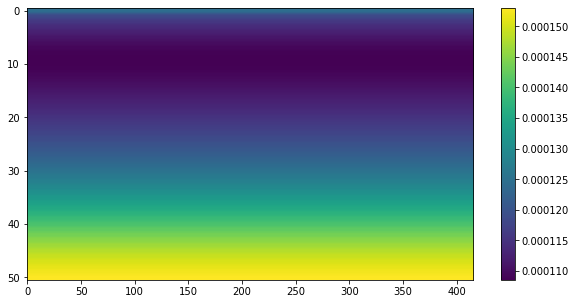

In [289]:
fig = plt.figure(figsize=(10,5))

plt.imshow(cols.transpose(), aspect='auto')
plt.colorbar()